<h1 style = 'text-align:center;'>  EDKO CONSULTING </h1>


<h4 style = 'text-align:left;'>Team Members:Kolawole David Olanipekun(Team_lead) Oreoluwa, Dorcas, Eric</h4>
<h4 style = 'text-align:left;'>Supervisor: Maryam Hassan</h4>

![picture](https://drive.google.com/uc?export=view&id=1nftVH6zqFEJ08rv8xMXQ7wXK6IuEwsge)




<a id="cont"></a>

## Table of Contents

<a href=#intro>1. Introduction </a>

<a href=#comet>1(a). Installation of  Comet ML </a>

<a href=#API>1(b). Experiment Created with API key </a>


<a href=#pack>2. Importing Packages</a>


<a href=#data>3. Loading Data</a>

<a href=#eda>4. Exploratory Data Analysis (EDA)</a>

<a href=#data_p>5. Data Preprocessing & Feature Engineering </a>

<a href=#model>6. Modeling</a>

<a href=#model_p>7. Model Performance & Explanation </a>

<a href=#con>8. Conclusion</a>

<a id="intro"></a>

# 1. Introduction
<a href=#cont>Back to Table of Contents</a>
<hr>

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from millions of options.

With this context, EDSA has consulted EDKO Consultings to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.


A recommender system functions by predicting a user's rating or preference for an item. This allows a service provider to build up a catalog of items which it believes the user will want to examine - thereby increasing their engagement with the service and allowing a wider array of content to be considered.


<img src="https://www.business2community.com/wp-content/uploads/2020/09/Working-and-Advantages-of-a-Recommendation-Engine.png" width="500" align="center">


### Problem Statements
<b>Construction of an application using content based or collaborative filtering recommendation algorithms, which has the capacity of accurately predicting how a user will rate a movie they have not yet viewed using their historical preferences.</b>



### Project Road Map
<hr>
<li> Analyse the supplied data </li>
<li> identify potential errors in the data and clean the existing data set </li>
<li> Matrix Factorization-based Algorithmt</li>
<li> Creating Handcrafted Features</li>
<li> Evaluate the performance of the machine learning model</li>
<li> Highlight key findings .</li>



<a id="comet"></a>

## 1(a). Installation to Comet ML  
<a href=#cont>Back to Table of Contents</a>

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.  

Added to this notebook is our api that connects all our team members input to this project 

In [ ]:
#This is to install the comet_ml package so we can link our notebook to the online comet project dashboard
!pip install comet_ml

     |████████████████████████████████| 347 kB 5.2 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 551 kB 43.7 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=273cc8b3e95b579a77fb9a43f6913a25157235125db9764e992c641ff2ec9381
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


<a id="API"></a>

## 1(b). Experiment Created with API key
<a href=#cont>Back to Table of Contents</a>


In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="JJyrYsOnpzZODYXKuMQOPS60e",
    project_name="movie-recommendation",
    workspace="kachi-k",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kachi-k/movie-recommendation/1916027b81b74799b3a94de6d5b75add



 <a id="pack"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

<b>We imported all the libraries and modules potentially needful for this project.</b>


In [1]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from time import time
import cufflinks as cf
from wordcloud import WordCloud, STOPWORDS
import pickle
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lightfm import LightFM
from sklearn.metrics import mean_squared_error
from surprise import accuracy
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time
import time
import numpy as np
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, preprocessing)

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)







<a id="data"></a>

## 3. Loading Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
!gdown 19_nTeSNZCJCRUttglAcZXbREg41hGdzC
!gdown 1NF76NgbbmYtzaZesCKqR18WDga4k39js
!gdown 1ZCLAEWyGjURSe36prBDM8ppt5vDGait0
!gdown 1c3W3AGNexRaK7fZZN0ICuf9ljLfUy_h0
!gdown 1y7OpOfNCcwRDJrSZvufyN2t1S8wwWbYw
!gdown 1QgmgplqGKMMlK1Ik7BFdQuz8SnrBdy1h
!gdown 1GfaefY6duSMZDZ8lA0Zry2xe-k-70UPL
!gdown 1IBALHeBFmlfLag887LhDQx8f-riAct_r

Downloading...
From: https://drive.google.com/uc?id=19_nTeSNZCJCRUttglAcZXbREg41hGdzC
To: /content/train.csv
100% 261M/261M [00:00<00:00, 267MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NF76NgbbmYtzaZesCKqR18WDga4k39js
To: /content/test.csv
100% 56.8M/56.8M [00:00<00:00, 83.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZCLAEWyGjURSe36prBDM8ppt5vDGait0
To: /content/tags.csv
100% 38.8M/38.8M [00:00<00:00, 174MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c3W3AGNexRaK7fZZN0ICuf9ljLfUy_h0
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 201MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y7OpOfNCcwRDJrSZvufyN2t1S8wwWbYw
To: /content/links.csv
100% 1.37M/1.37M [00:00<00:00, 159MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QgmgplqGKMMlK1Ik7BFdQuz8SnrBdy1h
To: /content/genome_scores.csv
100% 435M/435M [00:01<00:00, 252MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GfaefY6duSMZDZ8lA0Zry2xe-k-70UPL
To: /content/gen

In [2]:
!gdown 1c3W3AGNexRaK7fZZN0ICuf9ljLfUy_h0

Downloading...
From: https://drive.google.com/uc?id=1c3W3AGNexRaK7fZZN0ICuf9ljLfUy_h0
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 230MB/s]


In [5]:
! gdown --id  1zAJoioeNuqHogeVdos4eiTlrcIaRQXjl

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zAJoioeNuqHogeVdos4eiTlrcIaRQXjl
To: /content/genome_tags.csv
100% 18.1k/18.1k [00:00<00:00, 26.0MB/s]


In [6]:
! gdown --id  1MQ6h1Y4JznWfmF3u4iJWeR7347phgnxV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1MQ6h1Y4JznWfmF3u4iJWeR7347phgnxV
To: /content/genome_scores.csv
100% 435M/435M [00:01<00:00, 248MB/s]


In [6]:
! gdown --id 1Dw4BTWwLoJ4RJ9jOF1Z8egxNm7ubqOFm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Dw4BTWwLoJ4RJ9jOF1Z8egxNm7ubqOFm
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 180MB/s]


In [7]:
! gdown --id 1ibEw3q_34A4Jj93eUzZ_gBzWfXK23jPf

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ibEw3q_34A4Jj93eUzZ_gBzWfXK23jPf
To: /content/tags.csv
100% 38.8M/38.8M [00:00<00:00, 212MB/s]


#### Declaration of variables for downloaded datasets

#### Train and Test datasets

In [4]:
# This code is to store the train dataset into a variable
df= pd.read_csv('train.csv')
df_train =df

In [9]:
# This code is to store the test dataset into dataframes
dft = pd.read_csv('test.csv')
df_test=dft

#### Other Movie Datasets

In [3]:
#the movie dataset
df_movies = pd.read_csv('movies.csv')

In [11]:
#the imdb dataset
df_imdb = pd.read_csv('imdb_data.csv')

In [12]:
#the genome_scores dataset
df_genosco = pd.read_csv('genome_scores.csv')

In [13]:
#the genome dataset
df_genom = pd.read_csv('genome_tags.csv')

In [14]:
#the tags dataset
df_tags = pd.read_csv('tags.csv')

In [15]:
#the links dataset
df_links = pd.read_csv('links.csv')

<a id="eda"></a>
## 4. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
##### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


##### The info() method prints information about the DataFrame.The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [ ]:
#The info for the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
#The info for the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [ ]:
#The info for the movies dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
#The info for the imdb dataset
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
#The info for the genome scores dataset
df_genosco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [ ]:
#The info for the genome tags dataset
df_genom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
#The info for the tags dataset
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


### Deductions from the informations above
<li> The dataypes for the columns in the above datasets are a combination of object, integers and floats  </li>
<li> The memory usage of these datasets are quite large and would require more  processing power. </li>
<li> There will be a need to filter these datasets in the course of usage </li>

<hr>

### Checking for Missing Values in the given datasets
##### The concept of missing values is important to understand in order to successfully manage data. If the missing values are not handled properly by the researcher, then he/she may end up drawing an inaccurate inference about the data

In [ ]:
print("Train: ")
print(str(df_train.isnull().sum()))
print("############################################")

print("Test: ")
print(str(df_test.isnull().sum()))
print("############################################")

print("Movies: ")
print(str(df_movies.isnull().sum()))
print("############################################")

print("IMDB: ")
print(str(df_imdb.isnull().sum()))
print("############################################")

print("Genome scores: ")
print(str(df_genosco.isnull().sum()))
print("############################################")

print("Genome tags: ")
print(str(df_genom.isnull().sum()))
print("############################################")

print("Tags: ")
print(str(df_tags.isnull().sum()))
print("############################################")

print("Links: ")
print(str(df_links.isnull().sum()))
print("############################################")

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
############################################
Test: 
userId     0
movieId    0
dtype: int64
############################################
Movies: 
movieId    0
title      0
genres     0
dtype: int64
############################################
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
############################################
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
############################################
Genome tags: 
tagId    0
tag      0
dtype: int64
############################################
Tags: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
############################################
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
############################################


### Deductions from the missing values section above

<li> The imdb, tag and links dataset have  missing values  </li>

Let's visualize these null values to help us determine their magnitude and determine the best way to deal with them.

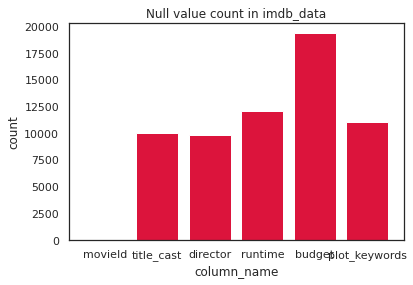

In [ ]:
#Visualizing null values in the imdb datasets
imdb_counts = df_imdb.isnull().sum()
links_counts = df_links.isnull().sum()

plt.bar(imdb_counts.index,
        imdb_counts.values.reshape(len(imdb_counts), ),
        color='crimson')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_data')
plt.show()

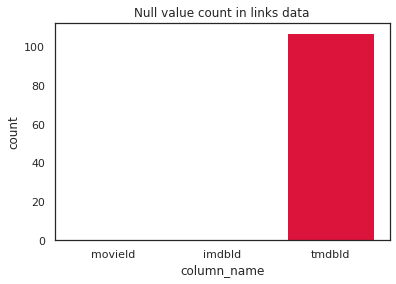

In [ ]:
#visualising null vlaues in the links datasets
plt.bar(links_counts.index,
        links_counts.values.reshape(len(links_counts), ),
        color='crimson')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in links data')
plt.show()

<li>The links dataset contains 107 null values in the tmdbId column.</li>

<li>The tmdb_data dataset contains alot of null values in 5 out of 6 columns. The column with the largest number of null values is the budget column.</li>

There are various ways of dealing with null values. These include:


1.   Deleting Rows with missing values
2.   Impute missing values for continuous variable
3.   Impute missing values for categorical variable
4.   Other Imputation Methods
5.   Using Algorithms that support missing values
6.   Prediction of missing values
7.   Imputation using Deep Learning Library — Datawig

We will look at this later on in the Feauture Engineering section.
















<hr>

### Visualising the Datasets

The .head() method allows us to see the contents of the top 5 entries in each dataset and most importantly, the titles of the columns in the datasets. 

This will allow us to see what we need to explore and what will be useful for every given stage of modelling. 


In [ ]:
#The head function applied on the train data
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
#The head function applied on the test data
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [ ]:
#The head function applied on the test data
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#The head function applied on the imdb data
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
#The head function applied on the genome score data
df_genosco.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
#The head function applied on the genome data
df_genom.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
#The head function applied on the tag data
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
#The head function applied on the link data
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


We see that the df_train is going to be sufficient with a few tweaks to perfom collaborative filtering. 

For content based filtering, our columns of interest would include: Genres, Plot keywords, Directors, title etc. This might require us to merge some of these datasets to give us the relevance we are looking for. 

Scroll down to the modelling section for more details.

### Analyzing the Rating 

This is a variable of interest for us as it is what we would be trying to predict. 

We look first at the total number of ratings in the train dataset then look at how the different ratings are distributed. 

In [ ]:
#Calculating the total number of rating in the dataset
print ("Number of rating in the dataset is")
print(df_train['rating'].sum())

Number of rating in the dataset is
35334086.0


#### <li> To analyse the rating value with the highest pick for recommendation </li>

Average rating in dataset: 3.5333951730983424


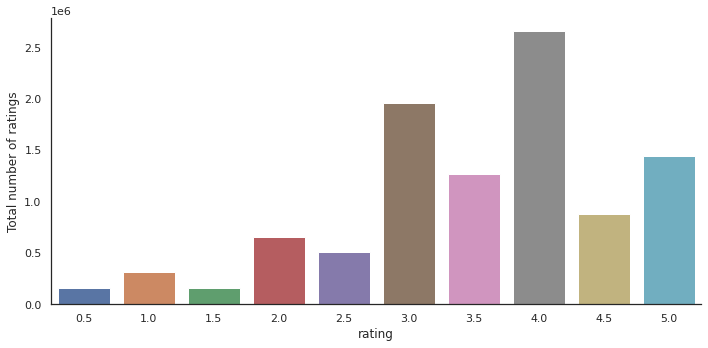

In [ ]:
#Display of all the average rating values against the totoal number of rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df_train, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(df["rating"])}')

Here we see that a bigger number of the users have rated movies quite fairly. With an average rating of 3.5 and the majority having given a rating of 3.0 and above. 

Rating 4.0 has the highest number of ratings. 

<hr>

#### Further analysis of rating given by the users

In [ ]:
#Deducing the Userid with the highest rating

no_of_rated_movie_per_user = df_train.groupby(by='userId')['rating'].count().sort_values(ascending=False)

no_of_rated_movie_per_user.head()

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
Name: rating, dtype: int64

Let's visualise this for better understanding.

Combined number of ratings:	 38970 
Total number of movies:		 48213


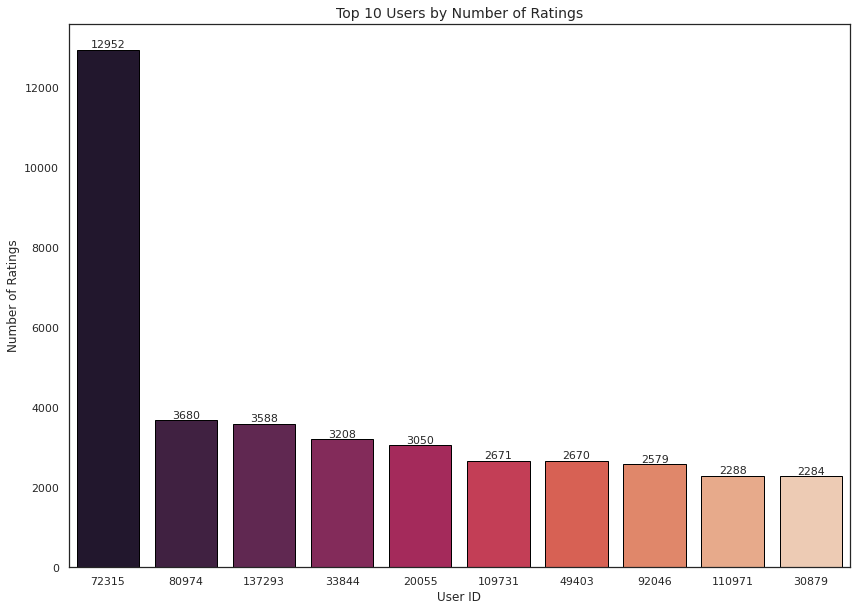

In [ ]:
# Top 10 users by rating plot
plt.figure(figsize=(14,10))
data = df_train['userId'].value_counts().head(10)
ax = sns.barplot(x = data, order= data.indexdata.index, y = , palette='rocket', edgecolor="black")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title(f'Top {10} Users by Number of Ratings', fontsize=14)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
print("Combined number of ratings:\t",df_train['userId'].value_counts().head(10).sum(),
     "\nTotal number of movies:\t\t", df_train['movieId'].nunique())
plt.show()

User 72315 has done the highest number of ratings. His/her ratings are 4 times higher than the 2nd highest use. 

This is an abvious outlier.  

To verify that the rating values and rating counts affects recommendation, the following analysis was carried out

In [ ]:
#mean rating calculated per movie
ratings_mean_count = pd.DataFrame(df_train.groupby('movieId')['rating'].mean())

In [ ]:
#rating counts of average movies
ratings_mean_count['rating_counts'] = pd.DataFrame(df_train.groupby('movieId')['rating'].count())


In [ ]:
#First five rows of the above analysis
ratings_mean_count.head()

,rating,rating_counts
movieId,,
1,3.889971,23062
2,3.263414,9654
3,3.132325,4727
4,2.878099,968
5,3.059165,4648


<Figure size 576x432 with 0 Axes>

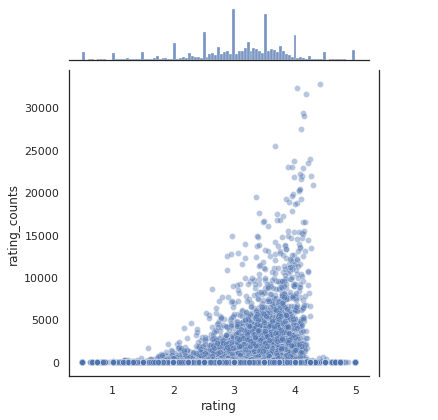

In [ ]:
#Plot of the rating counts with rating 
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

This analysis proves that movies with high rating have tendencies to be watched more than others with low ratings. In other words, users will rate these movies then they will be recommended to others and the trend of recommendation will be on the increase for these particular movies. 

### Exploring Movie Genres

In [ ]:
#Each movie has got several genres in it separated by '|'
#This code picks out each genre attached to a movie and adds it to a list then converts that to a dataframe that matches each genre to a movie.
genres = pd.DataFrame(df_movies['genres'].
                      str.split("|"). #removes '|' and splits the genres
                      tolist(),
                      index=df_movies['movieId']).stack()
genres = genres.reset_index([0, 'movieId']) #creates a new idex column
genres.columns = ['movieId', 'genre']
genres.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


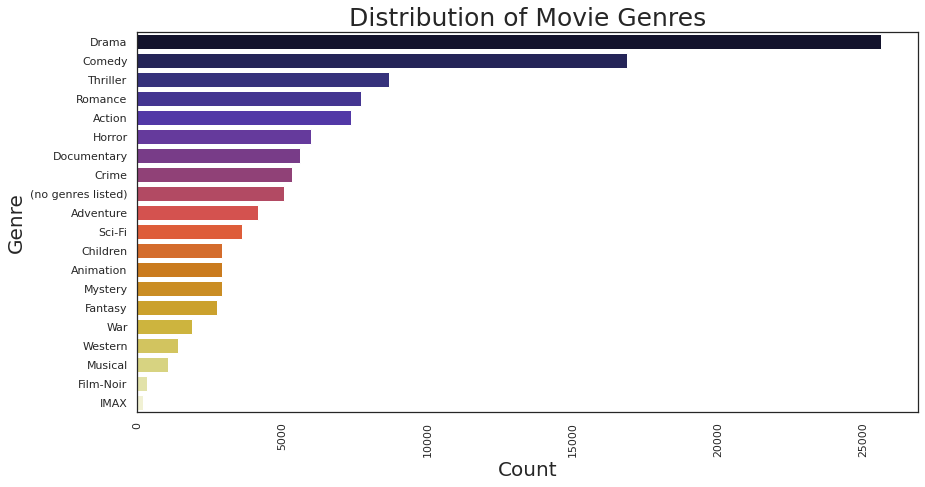

In [ ]:
#Plotting out the distribution of genres.
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(y='genre',
              data=genres,
              palette='CMRmap',
              order=genres['genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Count', size=20)
plt.ylabel('Genre', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

Drama is the most popular genre in the movies dataset.
The drama genre features stories with high stakes and a lot of conflicts. They're plot-driven and demand that every character and scene move the story forward. Dramas follow a clearly defined narrative plot structure, portraying real-life scenarios or extreme situations with emotionally-driven characters.

It makes sense why it would be most popular as the basic structure of every film would have some aspect of drama in it. 

### Exploring Movies by ratings

In [ ]:
#Merging train and movie datasets 
movies=pd.merge(df_train, df_movies,on='movieId',how='inner')
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
#Merging the above dataset with the imdb dataset to get more columns like director, budget etc
movies_ratings_df = pd.merge(movies,df_imdb,on='movieId',how='inner')
movies_ratings_df = movies_ratings_df.drop(['timestamp'], axis = 1)
movies_ratings_df.head()

,userId,movieId,rating,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
#Function to get the first top 10 titles by ratings
def plot_by_ratings(df,column, n):
    plt.figure(figsize=(10,6))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data, order= data.index, y = data.index, palette='rocket', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Number of ratings')
    plt.ylabel('Title')
    plt.xticks(rotation=90)
    plt.show()

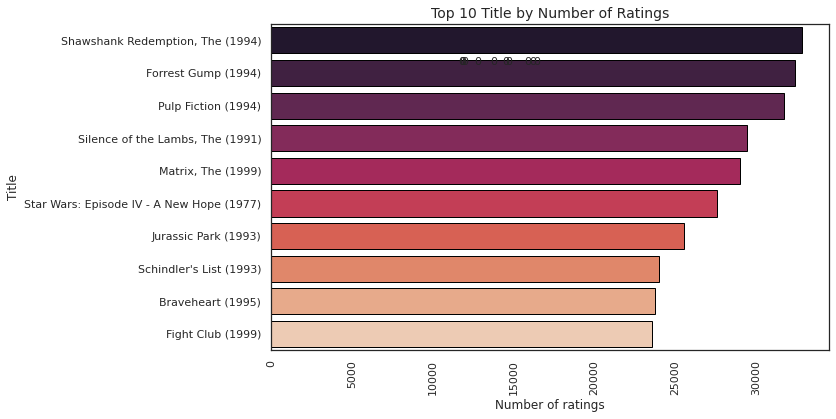

In [ ]:
# Functio applied to merged data
plot_by_ratings(movies_ratings_df,'title',10)

Here we see movies that have received the most number of ratings. They are not necessarily rated highly on the 1-5 scale but have been rated by more users. This could mean they have been watched by more users. 

From the top 10 we see that they are all older movies; 20 yrs and above with the oldest in the top 10 being 45.

Could it be they have received more ratings because they have been watched for a longer period? Are older movies better to watch? 

In [ ]:
#Function to get the first top 10 titles by ratings
def plot_by_ratings1(df,column, n):
    plt.figure(figsize=(10,6))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data, order= data.index, y = data.index, palette='rocket', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Number of ratings')
    plt.ylabel('Director')
    plt.xticks(rotation=90)
    plt.show()

### Exploring the Directors by Ratings

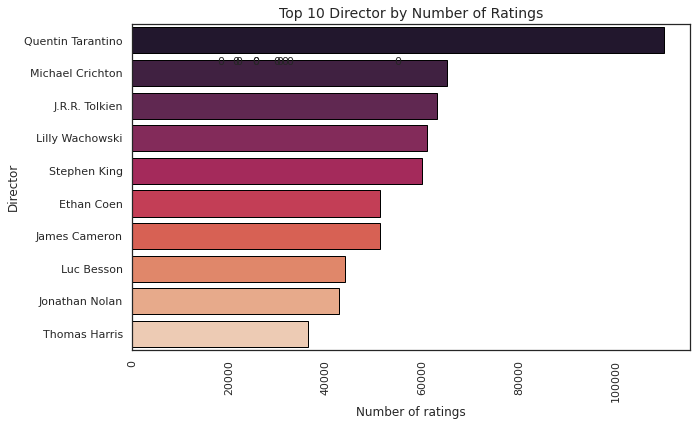

In [ ]:
#Top 10 directors by ratings
plot_by_ratings1(movies_ratings_df,'director',10)

Quentin Tarantino is an American filmmaker, actor, film critic and author. His films are characterized by frequent references to popular culture and film history, nonlinear storylines, dark humor, stylized violence, extended dialogue, pervasive use of profanity, cameos and ensemble casts.
He has been nominated for 88 movie awards and won 35 of those. His most popular works include : Pulp Fiction, Django Unchained, Inglourious Bastards and Once Upon a Time in Holywood to name but a few. 

We see here the other popular names like James Cameron, JRR Tolkien and the likes. 

Quentin is an obvious outlier here. Pulp Fiction one of his films appears in the most rated films. This suggests that a movies' directorship could influence how much it get's watched and therefore how many chances it gets to be rated. 

We have so far explored all the variables that would be of interest to us in the modelling section for both collaborative and content based filtering. 

Let's create two more WordClouds for the tag and plot keywords and see which are the most popular movie tags and plots. 

### Word Clouds

In [ ]:
from wordcloud import WordCloud

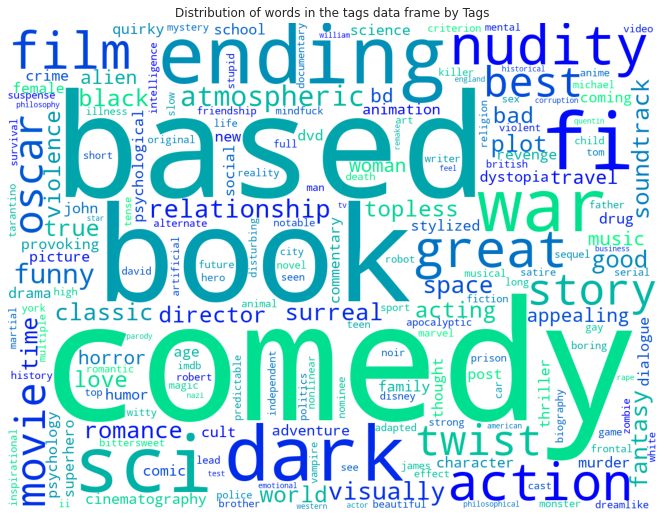

In [ ]:
#Creating the wordcloud
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for tag in df_tags['tag']:

    # change type of each tag to string
    tag = str(tag)

    # split the value
    tokens = tag.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1200, height=900,
                      colormap='winter',
                      background_color='white',
                      stopwords=stopwords,collocations=False,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(14, 7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()

#### insights
<li> Some popular words here include "comedy", "book", "based" </li>
<li> o further improve the content based recommendation system, these words can be merged with other keywords to improve similarity computation  </li>

<a id="data_p"></a>
## 5. Data Preprocessing & Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Principal Component Analysis
A widely encountered problem in machine learning is that of dimensionality. We typically refer to the size or shape of a dataset as an $n$ x $p$ matrix, where each row from 1 to $n$ represents an observation, or data point, and each column from 1 to $p$ represents a variable, or feature. With each additional feature, the dimensionality of a dataset increases by 1.

The problems with increasing or high levels of dimensionality are as follows:

- More storage space required for the data;
- More computation time required to work with the data; and
- More features mean more chance of feature correlation, and hence feature redundancy.

The latter point is the basis on which **principal component analysis** is carried out. A feature that is highly correlated with another increases when the other increases (positive correlation), or decreases when the other increases (negative correlation). This is helpful, because if multiple features tend to behave in a corresponding manner in the dataset, they can often be replaced by some smaller quantity of representative feature(s). This helps to lower the feature space within which the data reside, reducing computation time as well as storage capacity requirements.

The goal of dimensionality reduction is to reduce the number of features in a dataset while minimising the amount of data loss. There are three primary methods by which this can be done:

#### Performing Dimentionality Reduction on the Train dataset using the PCA Method 

##### <b>Filtering strategy applied to reduce the dataset due to lack of cmputing power: take users who have more than an available rating<b>

In [ ]:
#Filtering applied to train dataset
new_df=df_train.groupby("movieId").filter(lambda x:x['rating'].count() >=2000)
print('The filtered dataset has been reduced to given number of rows')
new_df.shape[0]

The filtered dataset has been reduced to given number of rows


6545701

In [ ]:
# create scaler object
scaler = StandardScaler()

In [ ]:
#Applying the preprocessing
new_df1 = preprocessing.scale(new_df)

In [ ]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(new_df1)


Text(0, 0.5, 'Cumulative explained variance')

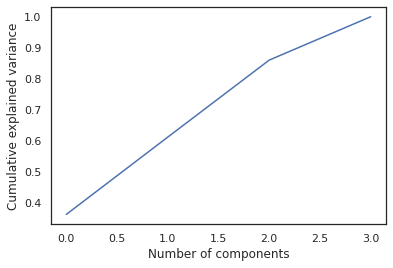

In [ ]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(new_df1)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

pca_df["rating"] = new_df["rating"]

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
#Let's check what the actual number of components would be for 85% variance retention
pca_85 = PCA(.85)
pca_85.fit_transform(new_df)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

86.0 % of variance explained by 3 components.


##### In this instance, the first component explains 60%, with the 2nd and 3rd following explaining the remianing 26% .Let's plot the first two components on a 2D scatter plot.

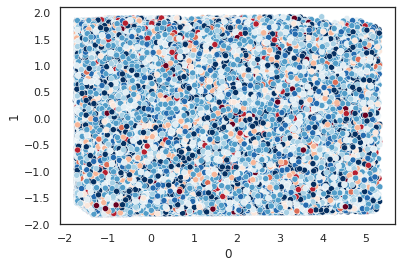

In [ ]:
ax = sns.scatterplot(x=pca_df[0], y=pca_df[1],
                     hue="rating",
                     palette='RdBu',
                     data=pca_df,
                     legend=False)
plt.show()

### Deductions from the Principal Component Analysis 

<li> <b>The Principal Component Analysis has helped to showed that 86.0 % of variance explained by 3 components.<b/>  </li>
<br>
<hr>


###  Other Dimensionality reduction techniques :


#### 2.Multi-dimensional Scaling (MDS)
The goal of MDS is to map features to a low-dimensional space, while preserving the distances between observations in a given data set.MDS can be performed using algorithms that are either metric or non-metric. Non-metric approaches are typically used to preserve ordinality (order) within data. This is more of a necessity when there are categorical features present in the data. Since the data used here is entirely numeric, we will use a metric approach.The stress is a measure of the degree to which distances between points in the original feature space correspond with the distances in the low-dimensional space. A lower stress value is preferred, and it is this quantity that is minimised by MDS.

<li>The <b>stress </b>is a measure of the degree to which distances between points in the original feature space correspond with the distances in the low-dimensional space. A lower stress value is preferred, and it is this quantity that is minimised by MDS.</li>

In [ ]:
# Subset the data to cut down computation time for now
genome_score = df_genosco[:10000000]


In [ ]:
# Scaling the data
scaler_mds = StandardScaler()
mds_geno = scaler_mds.fit_transform(genome_score.sample(frac=0.0001))

In [ ]:
# Computing the mds stress value
print("Computing MDS embedding")
clf = manifold.MDS(n_components=3, 
                   n_init=4, 
                   max_iter=200,
                   n_jobs=-1,
                   random_state=42,
                   dissimilarity='euclidean')
t0 = time()
X_mds = clf.fit_transform(mds_geno )
t1 = time()
print("Done. Stress: %f" % clf.stress_)

Computing MDS embedding
Done. Stress: 9.572618


#### insights
<li> A lower genome score data has displayed a loweer stress and this can be further used for the multidimensional scaling</li>

### 3.T-distributed Stochastic Neighbour Embedding (t-SNE)
T-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map. Note that whilst the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate."

In [ ]:
# Subset the data to cut down computation time for now
genome_score = df_genosco[:10000000]

In [ ]:
#  scaling the data
scaler_mds = StandardScaler()
mds_genome = scaler_mds.fit_transform(genome_score.sample(frac=0.0001))

In [ ]:
# initiation of the tsne function
tsne = TSNE(3, verbose = 2, perplexity = 10, learning_rate = 0.1)

In [ ]:
#Fiting the data 
tsne.fit(mds_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.129685
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = 84.3015137, gradient norm = 0.0000249 (50 iterations in 0.547s)
[t-SNE] Iteration 100: error = 84.3015137, gradient norm = 0.0000037 (50 iterations in 0.405s)
[t-SNE] Iteration 150: error = 84.3015213, gradient norm = 0.0000039 (50 iterations in 0.343s)
[t-SNE] Iteration 200: error = 84.3015213, gradient norm = 0.0000082 (50 iterations in 0.311s)
[t-SNE] Iteration 250: error = 84.3015137, gradient norm = 0.0000228 (50 iterations in 0.285s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.301514
[t-SNE] Iteration 300: error = 4.5402136, gradient norm = 0.0000374 (50 iterations in 0.282s)
[t-SNE] Iteration 350: error = 4.5402122, gradient norm = 0.00010

TSNE(learning_rate=0.1, n_components=3, perplexity=10, verbose=2)

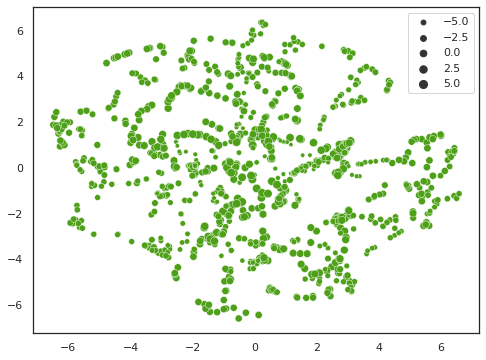

In [ ]:
# An attempt to display the t-sne embedding of the genom_score dataset
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2],color='#4DA017')
plt.show()

<li> An attempt was made to display the t-sne embedding of the genome score dataset</li>
<li> Though sparse but some similar probability distribution over the points can be faintly seen </li>


#### Data Preprocessing for Cosine Similarity Computation
To build a recommendation system, there will be a need to measure similarities between two entities.
The Cosine Similarity was used to calculate the numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

We used the TF-IDF Vectorizer, we then computed  the Cosine Similarity Score. 

In [4]:
#A variable was defined to store the movies dataset 
df_mov1 = df_movies

In [5]:
# Filtering of the movie dataframe to manage computing power and resources
df_mov = df_mov1[0:20000]

In [6]:
#selecting and displaying the genres column for cosine similarity 
new_merge = df_mov['genres']
new_merge

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
19995                                         Comedy
19996                                    Documentary
19997                                    Documentary
19998                           Crime|Horror|Mystery
19999                                          Drama
Name: genres, Length: 20000, dtype: object

In [7]:
#creating indices used to keep track of numbering of all entities in the movie column

titles = df_mov['title']
indices = pd.Series(df_mov.index, index=df_mov['title'])

In [12]:
#Titles series displayed
titles

0                                   Toy Story (1995)
1                                     Jumanji (1995)
2                            Grumpier Old Men (1995)
3                           Waiting to Exhale (1995)
4                 Father of the Bride Part II (1995)
                            ...                     
19995                                   Joker (2012)
19996                                   Gitmo (2005)
19997    My Avatar and Me (Min Avatar og mig) (2010)
19998                 Blood Beast Terror, The (1968)
19999                                 Othello (1981)
Name: title, Length: 20000, dtype: object

In [8]:
#Conversion to numerical vectors
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie, with TF-IDF features as columns 
tf_tag_ti_gen_matrix = tf.fit_transform(new_merge)

In [9]:
#Computation of cosine similarity : This is slower 
cosine_sim_tag = linear_kernel(tf_tag_ti_gen_matrix, 
                                        tf_tag_ti_gen_matrix)
print (cosine_sim_tag.shape)

(20000, 20000)


<li> A 200000 by 20000 cosine similarity matrix was developed </li>
<li> This will be used as input for the content based recommendation function for top N movies recommendation </li>

<a id="model"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>




### In this project  two types of recommendation system development techniques were used 
<li> Collaborative Filtering </li>
<li> Content Based Filtering </li>

### A.Collaborative filtering 
Collaborative Filtering is based on the idea that user A similar to another user B can be used to predict how much user A will like a particular product or service that User B have used/experienced .
Methods for recommender systems that are primarily based on previous interactions between users and the target items are known as collaborative filtering methods. 

 

As a result, all past data about user interactions with target objects will be fed into a collaborative filtering system. This information is usually recorded as a matrix, with the rows representing users and the columns representing items.

 

The basic premise of such systems is that the users' previous data should be sufficient to generate a prediction. That is, we don't require anything other than historical data, no more user input, no current trending data, and so on.

 

Furthermore, collaborative filtering methods are divided into two sub-groups: memory-based methods and model-based methods.



Surprise a Python scikit for building and analyzing recommender systems that deal with explicit rating data was used to build this  collaborative recommendation system



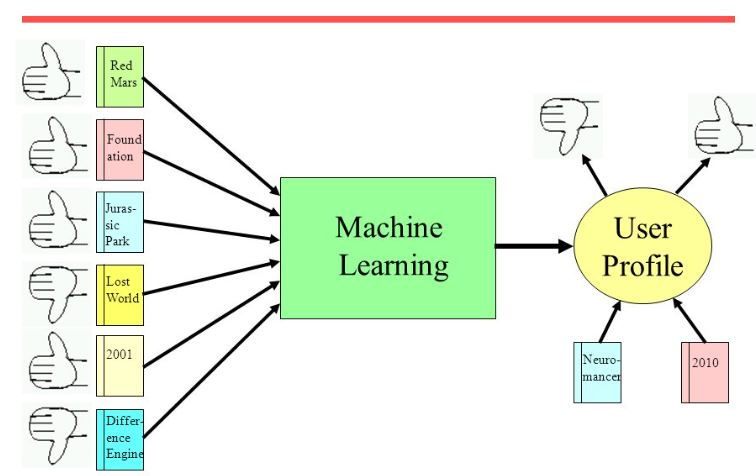


### Procedure for using the Surprise Python Scikit  Prediction Algorithm
 <li>To manage computing power, the trainset was splitted </li>
<li> The different predictor algorithms were then executed on the traintest split </li>

<li>The best predictor model was then improved for a better model</li>

In [ ]:
#Trainset split
train_df = df_train 
train_df.drop('timestamp', axis=1, inplace=True)
train_subset = train_df[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)


#### Below are the following Surprise Prediction Algorithm used

#### NMF  
<li>NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.</li>

In [ ]:
nmf_test = NMF()
nmf_test.fit(trainset)
# Grab Currrent Time Before Running the Code
start = time.time()
predictions = nmf_test.test(testset)
# Grab Currrent Time After Running the Code
end = time.time()
total_time_NMF = end - start
print("\n"+ str(total_time_NMF))
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)



0.19048404693603516
RMSE: 1.1630


#### BaselineOnly  
<li>The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS)</li>

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
# Grab Currrent Time Before Running the Code
start = time.time()
predictions = blo_test.test(testset)
# Grab Currrent Time After Running the Code
end = time.time()
total_time_Baselineonly = end - start
print("\n"+ str(total_time_Baselineonly))
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)


Estimating biases using sgd...

0.29105281829833984
RMSE: 0.9735


#### NormalPredictor  
<li>The Normal Predictor algorithm predicts a random rating for each movie based on the distribution of the training set, which is assumed to be normal.</li>

In [ ]:
np_test = NormalPredictor()
np_test.fit(trainset)
# Grab Currrent Time Before Running the Code
start = time.time()
predictions = np_test.test(testset)
# Grab Currrent Time After Running the Code
end = time.time()
total_time_NormaPred = end - start
print("\n"+ str(total_time_NormaPred))
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)



0.20646238327026367
RMSE: 1.4411


#### SlopeOne  
<li>The SlopeOne algorithm is a simple yet accurate collaborative filtering algorithm that uses a simple linear regression model to solve the data sparisity problem. </li>

In [ ]:
slo_test = SlopeOne()
slo_test.fit(trainset)
# Grab Currrent Time Before Running the Code
start = time.time()
predictions = slo_test.test(testset)
# Grab Currrent Time After Running the Code
end = time.time()
total_time_slopeone = end - start
print("\n"+ str(total_time_slopeone))
# Calculate RMSE
slo_rmse = accuracy.rmse(predictions)



0.18357133865356445
RMSE: 1.1598


### SVD
<li> The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize. When baselines are not used, this is equivalent to Probabilistic Matrix Factorization.</li>

In [ ]:
svd_test = SVD(n_epochs = 10, n_factors = 50, init_std_dev = 0.05, random_state=42)
svd_test.fit(trainset)
# Grab Currrent Time Before Running the Code
start = time.time()
predictions = svd_test.test(testset)
# Grab Currrent Time After Running the Code
end = time.time()
total_time_svd = end - start
print("\n"+ str(total_time_svd))
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)



0.18507862091064453
RMSE: 0.9888


### k-NN inspired algorithms
<li> These are algorithms that are directly derived from a basic nearest neighbors approach.</li>

In [ ]:
algo = KNNWithMeans(k=3, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)
# Grab Currrent Time Before Running the Code
start = time.time()
predictions = algo.test(testset)
# Grab Currrent Time After Running the Code
end = time.time()
total_time_KNN = end - start
print("\n"+ str(total_time_svd))
KNN_rmse = accuracy.rmse(predictions)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

0.346294641494751
RMSE: 1.0423


### Deductions from running all six models

<li> <b>Six different models were executed with their RMSE and execution time<b/>  </li>


### A.Content Based Recommendation Systems
Content-based filtering is one popular technique of recommendation or recommender systems. The content or attributes of the things you like are referred to as "content." 

 

Here, the system uses your features and likes in order to recommend you with things that you might like. It uses the information provided by you over the internet and the ones they are able to gather and then they curate recommendations according to that.  

 

The goal behind content-based filtering is to classify products with specific keywords, learn what the customer likes, look up those terms in the database, and then recommend similar things.

 

This type of recommender system is hugely dependent on the inputs provided by users, some common examples included Google, Wikipedia, etc. For example, when a user searches for a group of keywords, then Google displays all the items consisting of those keywords. 

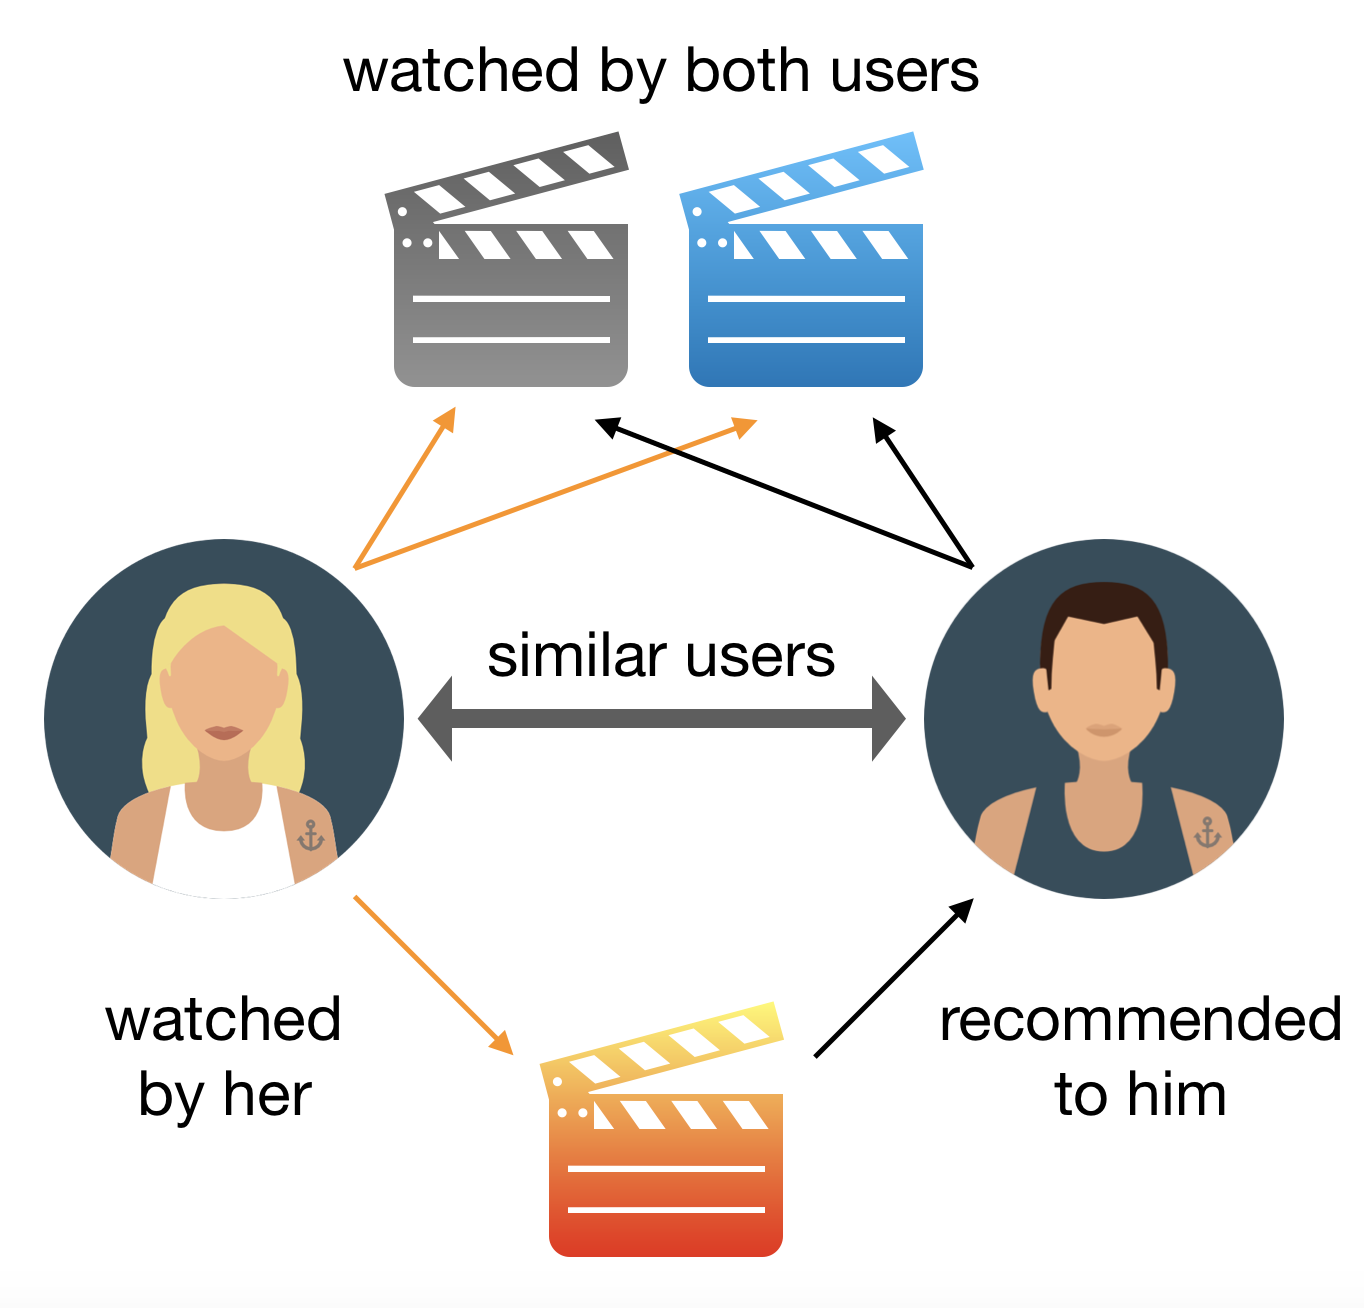


#### <b> We developed a recommendation system function that uses the cosine similarity matrix to predict movies for users when a movie is suggested </b>

In [ ]:
### Recall the preprocessed variables for the top N recommendation function developed for movie suggestions.
# Cosine similarity matrix
cosine_sim_tag 
#Indexing variable
indices

In [10]:
def content_generate_top_N_recommendations(movie_title, N=10):
    """
    Function to generate the top N movies for any movie inserted:
    Parameters
    ----------
        mvoie_title (string): input the title of any movie in the filtered  dataset
        N: The number of movie titles to be suggested on initiation of the function
        
    Returns
    -------
        N movie titles similar to the inserted movie
    
    """
    
    # Convert the string movie title to a numeric index for our 
    # similarity matrix
    m_idx = indices[movie_title]
    # Extract all similarity values computed with the reference movie title
    sim_scores = list(enumerate(cosine_sim_tag[m_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [13]:
## Testing of the recommendation function
content_generate_top_N_recommendations("Grumpier Old Men (1995)", N=10)

6                          Sabrina (1995)
38                        Clueless (1995)
63                   Two if by Sea (1996)
67     French Twist (Gazon maudit) (1995)
116                   If Lucy Fell (1996)
120                      Boomerang (1992)
127                 Pie in the Sky (1996)
178                       Mallrats (1995)
184                    Nine Months (1995)
Name: title, dtype: object

<a id="model_p"></a>
## 7. Model Performance & Validation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### The performance and accuracy of the collaborative filtering models were evaluated  using a statistical measure known as the root mean squared error (**RMSE**), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$   

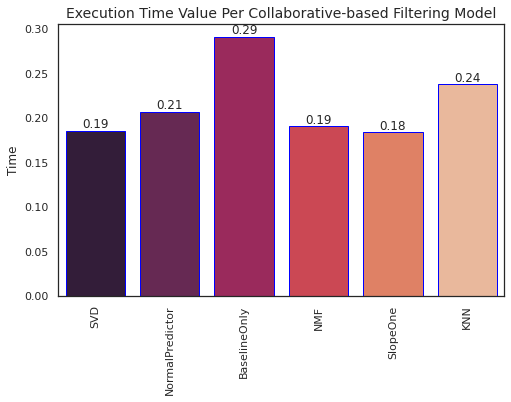

In [ ]:
#Comparing Execution time of all Models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','KNN']
rmse_y = [total_time_svd,total_time_NormaPred,total_time_Baselineonly, total_time_NMF,total_time_slopeone,total_time_KNN]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='rocket',edgecolor='blue')
plt.title('Execution Time Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Time')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()


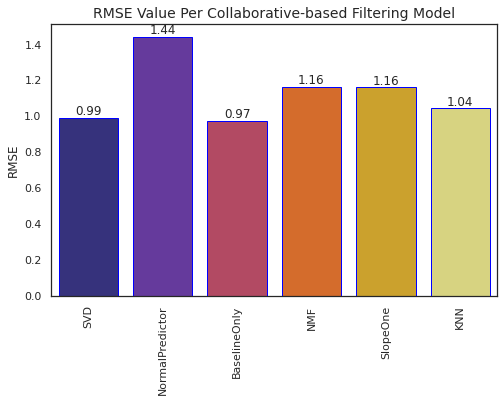

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','KNN']
rmse_y = [svd_rmse,np_rmse,blo_rmse,nmf_rmse,slo_rmse,KNN_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='CMRmap',edgecolor='blue')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

### Deductions Model Performance and Evaluation

<li> <b>The SVD model proved gave a better RMSE value with the best processing time<b/>  </li>
<li> <b>This informed our decision to improve the SVD model for a better RMSE and processing time.<b/>  </li>

### <b>Hyperparameter Optimization for the chosen Collaborative Model  </b>
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are learned
Hyperparameter tuning is also choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning

<li> Grid param analysis was implemented to choose optimal hyperparameters</li>

In [ ]:
param_grid = {'n_epochs':[40], #[30,40,50],
              'n_factors':[400], #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

***Best score:***
0.9680101181808783
***Best parameters:***
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


### IMPROVED SVD Model 

<li>The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.</li>

<li> After evaluating optimised paramters via the param-grid, we were able to improve the output of our model </li>

In [ ]:
train_df = df
test_df = dft

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("Team_14_submission.csv", index=False)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


### FINAL KAGGLE SUBMISSION 

In [ ]:
train_df = df
test_df = dft

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("Team_14_submission.csv", index=False)

### Pickle File Creation for Streamlit App

In [ ]:
filename = 'Surp_model.pkl'
with open(filename,'wb') as file:
    pickle.dump(svd,file)
 

<a id="con"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<li> The Edsa Movie recommendation system Project  was a success as we were able to build <b>seven (7)</b> unsupervised machine learning models( Six collaborative filtering and one content based recommendation system) </li>
 <li> The collaborative predictor models are capable of predicting how a user will rate a movie they are yet to watch while the content based recommendation system is capable of predicting top N movies similar to inserted movies. </li>   
<li>Movies under the drama genre and movies by profound directors had higher ratings while movies with higher ratings got more audience views. These insights can be used by movie industries to improve their movie production strategies which can in turn  boost revenue generation.</li>

<li> A cosine similarity matrix was designed using the genres of movies in the database</li>

<li> our best model was the Single value decomposition predictor model with a better  root mean square error value(RMSE) score and processing time. </li>

<li> The kaggle platform evaluated our model's RMSE value to 0.78602 </li>
<li>This recommendation system will help movie industries boost the artificial intelligence performance of their movie platofrms by engaging  and retaining  their customers thereby leading to increased revenue generation.
 <li> The major challenge encountered was the persistent crashing of our  machines due to low processing memories. we were able to manage this challenge by using other higher computing processors like Google colab pro and AWS sagemaker</li>

